In [1]:
import kan
import kan.KANLayer
import kan.KALU as kalu
import torch
import numpy as np

import importlib
importlib.reload(kan)
importlib.reload(kalu)

from sklearn.model_selection import train_test_split

In [2]:
size = 1000
X = 10*(torch.rand((size, 1)) - 0.5)
#y = (X[:,0] * X[:,1])**2
y = X**2 + X
y = y / y.abs().max()
y = y.reshape([len(y), 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
dataset = {"train_input" : X_train, "test_input" : X_test, "train_label" : y_train, "test_label" : y_test}

In [3]:
kan_network = kan.KAN(width=[1,2,1], grid=10, k=3)
results = kan_network.train(dataset, opt="Adam", steps=2000, lr=0.001, lamb=0.1, batch=-1)

train loss: 8.27e-02 | test loss: 8.27e-02 | reg: 1.14e+00 : 100%|█| 2000/2000 [00:09<00:00, 201.08i


In [4]:
kalu_network = kalu.KALU(width=[1,2,1], grid=10, k=3)
kalu_network.train(dataset, steps=2000, lr=0.001, lamb=0.1, batch=-1)

Train MSE : 0.00135 | Test MSE : 0.00155 | Regularization : 0.00177:  78%|███████▊  | 1570/2000 [00:22<00:06, 64.66it/s]

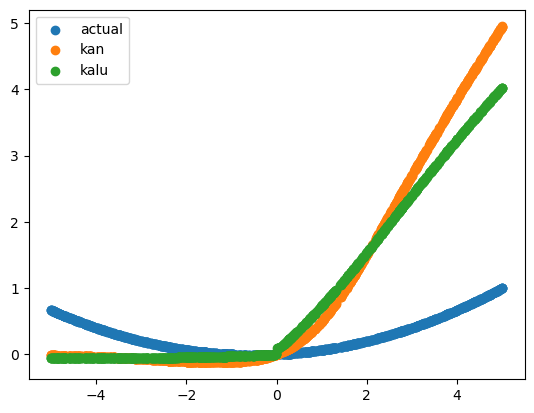

In [24]:
import matplotlib.pyplot as plt
plt.scatter(X.numpy(), y.numpy(), label="actual")
plt.scatter(X.numpy(), kan_network(X).detach().numpy(), label="kan")
plt.scatter(X.numpy(), kalu_network(X).detach().numpy(), label="kalu")
plt.legend()